In [15]:
using Plots
include("ring_attractor.jl");

In [35]:
function mean_activity(N, par)
    sim =SimulationParameters(64, 10000, 5e-4, (), 0, 0.05, -0.10, 0.05, -0.25)
    mean_rate = zeros(sim.N, N)
    mean_spikes = zeros(sim.N, N)
    for i in 1:N
        pot = simulate(par, sim)
        spikes = Array{Int32, 2}(pot .== 0)
        mean_spikes[:, i] = sum(spikes, dims=2)
        mean_rate[:, i] = view(mean_spikes, :, i) ./ sim.time
    end
    
    mean(mean_spikes, dims=2), mean(mean_rate, dims=2)
end

mean_activity (generic function with 2 methods)

In [36]:
mean_spikes, mean_rate = mean_activity(1000, par);

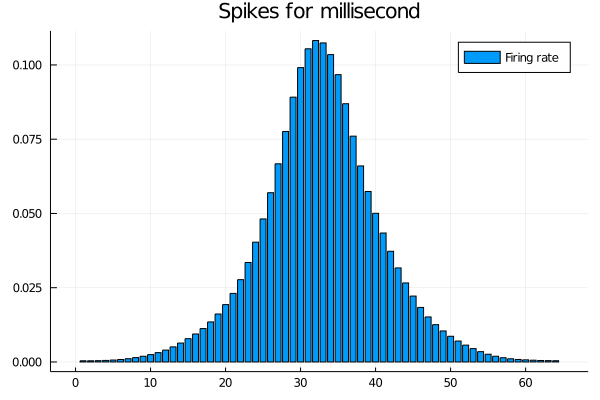

In [43]:
bar(mean_rate, lab="Firing rate")
title!("Spikes for millisecond")

In [59]:
findall(mean_rate .> 0.09)

6-element Array{CartesianIndex{2},1}:
 CartesianIndex(30, 1)
 CartesianIndex(31, 1)
 CartesianIndex(32, 1)
 CartesianIndex(33, 1)
 CartesianIndex(34, 1)
 CartesianIndex(35, 1)